# Fairness Evaluations

In [1]:
import sys
sys.path.insert(0,'../..')
from fairness import *

Set up the configuration file and load some targeting simulation data.


In [3]:
fairness = Fairness('../../configs/config_emily.yml')

Create a "rank residuals boxplot". Provide (1) a ground-truth poverty measure, (2) a set of proxy poverty measures that could be used for targeting, and (3) a characteristic of interest to evaluate fairness across (the characteristic must take on at least two distinct values that appear in the dataset). The "rank residual" for each observation will be calculated: the difference between the ranking of that observation according to the proxy and according to the ground truth. We then visualize the distribution of rank residuals for each group; if proxy measures are fair targeting methods the mean of all distributions should be close to 0. 

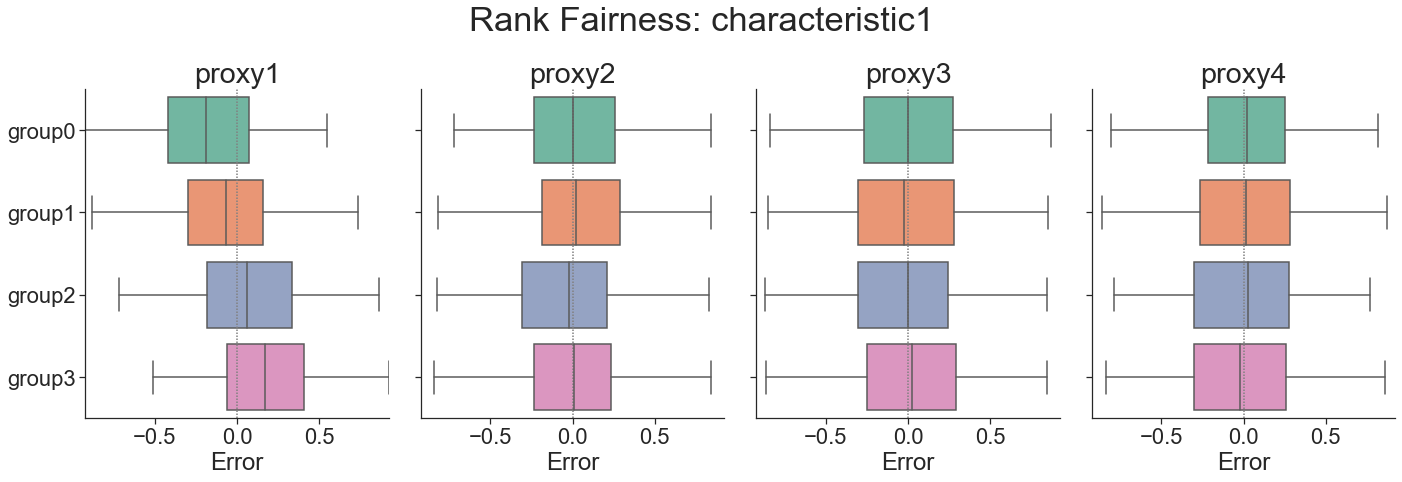

In [4]:
fairness.rank_residuals_plot('consumption', ['proxy1', 'proxy2', 'proxy3', 'proxy4'], 'characteristic1')

To test the statistical significance of the difference in means for each proxy, use an ANOVA test. Results are presented in a table that records the mean and standard deviation of rank residuals by proxy and group, and the ANOVA test for the difference in means between groups. Look for large F statistics and p-values less than 0.05.

In [10]:
fairness.rank_residuals_table('consumption', ['proxy1', 'proxy2', 'proxy3', 'proxy4'], 'characteristic1')

,characteristic1,proxy1,proxy2,proxy3,proxy4
0,group0,-0.19 (0.35),0.00 (0.35),-0.00 (0.38),0.02 (0.35)
1,group1,-0.06 (0.35),0.04 (0.36),-0.01 (0.39),0.00 (0.40)
2,group2,0.08 (0.37),-0.03 (0.37),-0.01 (0.39),-0.00 (0.39)
3,group3,0.18 (0.35),-0.01 (0.38),0.02 (0.36),-0.02 (0.38)
4,Anova F-Stat,50.5158,1.70087,0.457882,0.278307
5,Anova p-value,2.14768e-30,0.165174,0.711784,0.841081


Provide a targeting threshold (in percentile) to calculate demographic parity: the difference between the share of a group that is targeted according to each proxy measure and the share of the group that is targeted according to the ground-truth proxy measure. Differences are provided as percentage points. 

In [13]:
fairness.demographic_parity_table('consumption', ['proxy1', 'proxy2', 'proxy3', 'proxy4'], 'characteristic1', 50)

,characteristic1,Group's share of population,Share of Group in Target Population,proxy1,proxy2,proxy3,proxy4
0,group0,24.90%,53.01%,20.481928,-3.614458,0.000000,-2.811245
1,group1,25.70%,50.97%,7.003891,-5.836576,1.556420,0.778210
2,group2,25.90%,47.88%,-9.266409,6.563707,1.930502,-1.544402
3,group3,23.50%,48.09%,-19.148936,2.978723,-3.829787,3.829787


Visualize the above table as a heatmap with bubbles. 

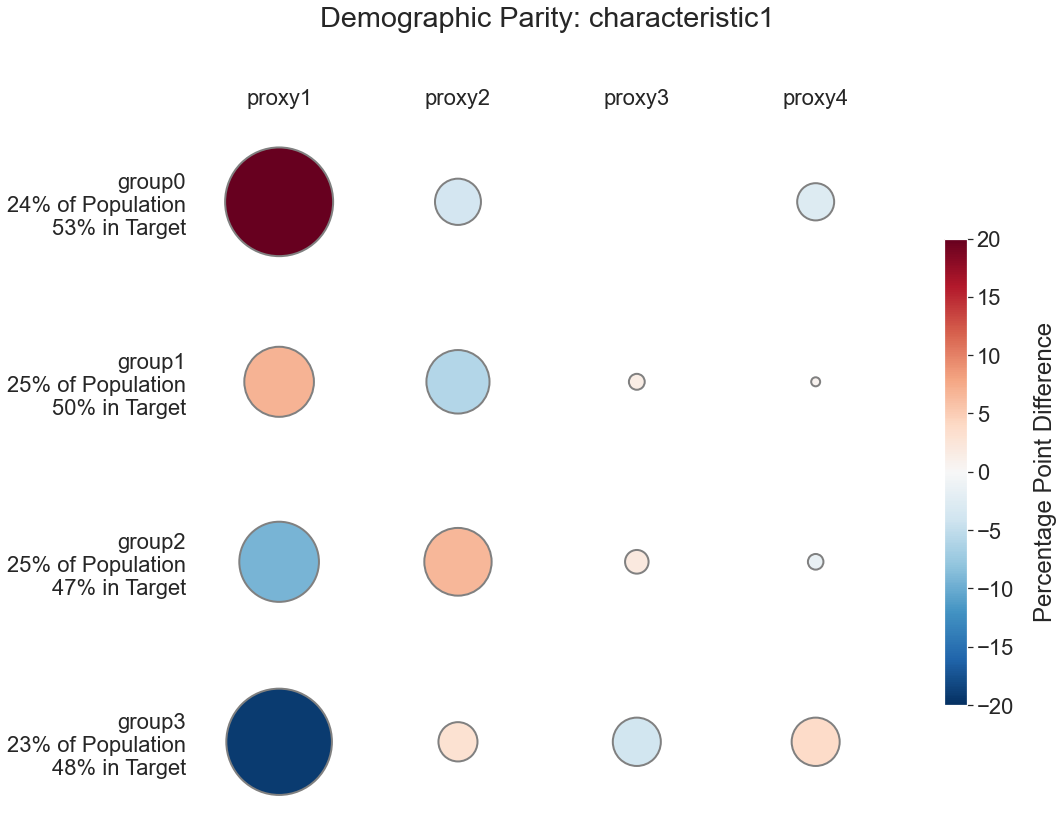

In [15]:
fairness.demographic_parity_plot('consumption', ['proxy1', 'proxy2', 'proxy3', 'proxy4'], 'characteristic1', 50)